MSRFuseNet - Preprocessing - DWT(3 Features) - INSOMNIA - 50 - TRAINED ON ANOTHER CPU 

⚠️ No GPU found. Training might be slow.
Total epochs: 60000, Each epoch samples: 1024, DWT features per epoch: 15
Valid epochs after masking: 56844
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ppg_input (InputLayer)         [(None, 1024, 1)]    0           []                               
                                                                                                  
 gaussian_noise (GaussianNoise)  (None, 1024, 1)     0           ['ppg_input[0][0]']              
                                                                                                  
 separable_conv1d (SeparableCon  (None, 1024, 32)    79          ['gaussian_noise[0][0]']         
 v1D)                                                                                             
                                            

 average_pooling1d (AveragePool  (None, 256, 32)     0           ['max_pooling1d_1[0][0]']        
 ing1D)                                                                                           
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 256, 32)     128         ['separable_conv1d_8[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 tf.math.subtract (TFOpLambda)  (None, 256, 32)      0           ['max_pooling1d_1[0][0]',        
                                                                  'average_pooling1d[0][0]']      
                                                                                                  
 add_1 (Add)                    (None, 256, 32)      0           ['batch_normalization_9[0][0]',  
          

                                                                                                  
 flatten (Flatten)              (None, 8192)         0           ['layer_normalization_2[0][0]']  
                                                                                                  
 batch_normalization_14 (BatchN  (None, 32)          128         ['dense_5[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 concatenate_1 (Concatenate)    (None, 8224)         0           ['flatten[0][0]',                
                                                                  'batch_normalization_14[0][0]'] 
                                                                                                  
 dense_6 (Dense)                (None, 64)           526400      ['concatenate_1[0][0]']          
          

Epoch 35/100
2714/2714 [==============================] - 679s 250ms/step - loss: 0.0617 - accuracy: 0.6763 - val_loss: 0.0553 - val_accuracy: 0.7027 - lr: 1.0000e-04
Epoch 36/100
2714/2714 [==============================] - 678s 250ms/step - loss: 0.0613 - accuracy: 0.6787 - val_loss: 0.0528 - val_accuracy: 0.7102 - lr: 1.0000e-04
Epoch 37/100
2714/2714 [==============================] - 678s 250ms/step - loss: 0.0609 - accuracy: 0.6806 - val_loss: 0.0533 - val_accuracy: 0.7152 - lr: 1.0000e-04
Epoch 38/100
2714/2714 [==============================] - 678s 250ms/step - loss: 0.0604 - accuracy: 0.6803 - val_loss: 0.0531 - val_accuracy: 0.7229 - lr: 1.0000e-04
Epoch 39/100
2714/2714 [==============================] - 679s 250ms/step - loss: 0.0599 - accuracy: 0.6810 - val_loss: 0.0549 - val_accuracy: 0.7272 - lr: 1.0000e-04
Epoch 40/100
2714/2714 [==============================] - 672s 248ms/step - loss: 0.0577 - accuracy: 0.6907 - val_loss: 0.0505 - val_accuracy: 0.7271 - lr: 5.0000e-0

2714/2714 [==============================] - 669s 247ms/step - loss: 0.0417 - accuracy: 0.7445 - val_loss: 0.0396 - val_accuracy: 0.7587 - lr: 7.8125e-07
Epoch 85/100
2714/2714 [==============================] - 670s 247ms/step - loss: 0.0419 - accuracy: 0.7438 - val_loss: 0.0396 - val_accuracy: 0.7600 - lr: 3.9062e-07
Epoch 86/100
2714/2714 [==============================] - 671s 247ms/step - loss: 0.0416 - accuracy: 0.7437 - val_loss: 0.0400 - val_accuracy: 0.7572 - lr: 3.9062e-07
Epoch 87/100
2714/2714 [==============================] - 675s 249ms/step - loss: 0.0418 - accuracy: 0.7440 - val_loss: 0.0398 - val_accuracy: 0.7608 - lr: 3.9062e-07
Epoch 88/100
2714/2714 [==============================] - 680s 251ms/step - loss: 0.0418 - accuracy: 0.7440 - val_loss: 0.0396 - val_accuracy: 0.7594 - lr: 1.9531e-07
Epoch 89/100
2714/2714 [==============================] - 676s 249ms/step - loss: 0.0418 - accuracy: 0.7453 - val_loss: 0.0398 - val_accuracy: 0.7609 - lr: 1.9531e-07
Epoch 90/10

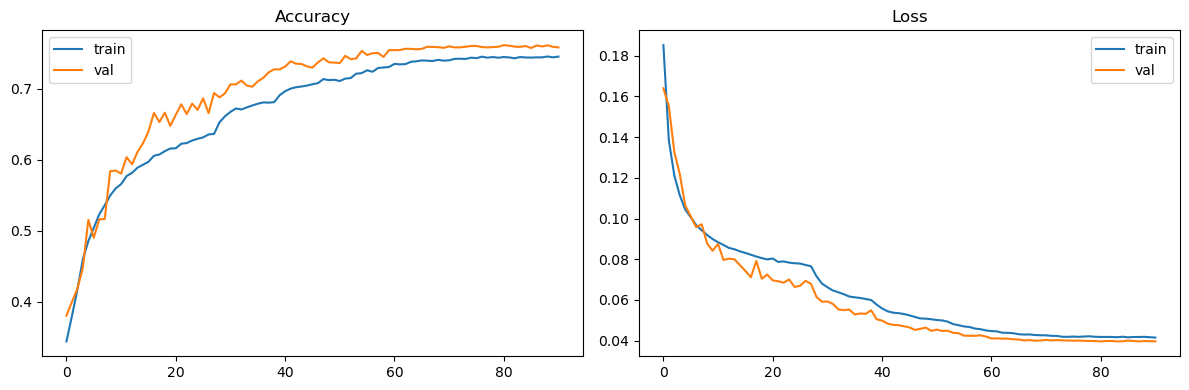

679/679 [==============================] - 34s 49ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.45      0.59      4342
           1       0.97      0.94      0.96      4341
           2       0.64      0.51      0.57      4341
           3       0.96      0.98      0.97      4342
           4       0.55      0.93      0.69      4341

    accuracy                           0.76     21707
   macro avg       0.80      0.76      0.75     21707
weighted avg       0.80      0.76      0.75     21707

[[1968   14  980   11 1369]
 [  27 4094   22  140   58]
 [ 222   22 2207   38 1852]
 [   3   68    2 4236   33]
 [  63    3  255    2 4018]]

🧠 Cohen Kappa Score: 0.7015


INFO:tensorflow:Assets written to: C:\Users\divgy\AppData\Local\Temp\tmp5uwbff7e\assets


INFO:tensorflow:Assets written to: C:\Users\divgy\AppData\Local\Temp\tmp5uwbff7e\assets



⏱️ Total training time: 1022.44 minutes


In [1]:
import numpy as np
import os, glob, scipy.io, time
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import cheby2, filtfilt, resample_poly
from numpy.polynomial.polynomial import Polynomial
import pywt  # Added for DWT

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, SeparableConv1D, MaxPooling1D, GlobalAveragePooling1D,
                                     Flatten, Dense, Dropout, Multiply, Add, LayerNormalization,
                                     Lambda, GaussianNoise, BatchNormalization, SpatialDropout1D,
                                     Concatenate, Masking)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

tf.keras.backend.clear_session()

# --- GPU setup ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU detected: {gpus[0]}")
    tf.config.experimental.set_memory_growth(gpus[0], True)
else:
    print("⚠️ No GPU found. Training might be slow.")

# --- Constants ---
ORIG_FS = 256  # Original sampling frequency
TARGET_FS = 34.3  # Target sampling frequency (from paper)
EPOCH_SAMPLES = 1024  # Samples per epoch at TARGET_FS
TOTAL_HOURS = 10
EPOCHS_PER_HOUR = int(3600 * TARGET_FS / EPOCH_SAMPLES)  # epochs in 1 hour
TOTAL_EPOCHS = TOTAL_HOURS * EPOCHS_PER_HOUR  # fixed length for each subject
DWT_LEVELS = 4  # Number of DWT decomposition levels
WAVELET = 'db4'  # Wavelet type for DWT

# --- Preprocessing functions ---

def cheby2_lowpass_filter(signal, fs, cutoff=8, order=8, rs=40):
    nyq = 0.5 * fs
    wp = cutoff / nyq
    b, a = cheby2(order, rs, wp, btype='low', analog=False)
    filtered = filtfilt(b, a, signal)
    return filtered

def poly_detrend(signal, degree=10):
    x = np.arange(len(signal))
    coefs = Polynomial.fit(x, signal, degree).convert().coef
    trend = np.polyval(coefs[::-1], x)
    detrended = signal - trend
    return detrended

def min_max_norm(signal):
    min_val = np.min(signal)
    max_val = np.max(signal)
    if max_val - min_val == 0:
        return signal * 0  # avoid div by zero if flat signal
    return (signal - min_val) / (max_val - min_val)

def extract_dwt_features(signal, wavelet=WAVELET, level=DWT_LEVELS):
    # Perform DWT decomposition
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    # Flatten and compute statistical features (mean, std, energy) for each coefficient
    features = []
    for c in coeffs:
        features.extend([
            np.mean(c), np.std(c), np.sum(c**2)  # Mean, std, energy
        ])
    return np.array(features)

def preprocess_ppg_signal(ppg_signal, orig_fs=ORIG_FS, target_fs=TARGET_FS,
                          epoch_samples=EPOCH_SAMPLES, total_epochs=TOTAL_EPOCHS):
    # 1. Filter
    filtered = cheby2_lowpass_filter(ppg_signal, orig_fs)
    # 2. Detrend
    detrended = poly_detrend(filtered)
    # 3. Min-max normalization
    normalized = min_max_norm(detrended)
    # 4. Resample to target_fs
    up = int(target_fs * 1000)
    down = int(orig_fs * 1000)
    gcd = np.gcd(up, down)
    up //= gcd
    down //= gcd
    resampled = resample_poly(normalized, up, down)
    # 5. Epoching: slice into fixed length segments of epoch_samples
    total_samples = epoch_samples * total_epochs
    if len(resampled) > total_samples:
        resampled = resampled[:total_samples]
    elif len(resampled) < total_samples:
        pad_len = total_samples - len(resampled)
        resampled = np.pad(resampled, (0, pad_len), 'constant')
    # 6. Reshape to epochs
    epochs = resampled.reshape(total_epochs, epoch_samples)
    # Create mask to mark zero-padded epochs
    mask = np.array([0 if np.sum(e) == 0 else 1 for e in epochs])
    # 7. Extract DWT features for each epoch
    dwt_features = np.array([extract_dwt_features(epoch) for epoch in epochs])
    return epochs, dwt_features, mask

# --- Load raw data and preprocess once ---

folder_path = r"C:\Users\divgy\Desktop\abhishek_extracted\insomnia"
mat_files = sorted(glob.glob(os.path.join(folder_path, "*.mat")))[:50]

X_epochs_list = []
X_dwt_list = []
y_epochs_list = []
mask_list = []

for file in mat_files:
    mat = scipy.io.loadmat(file)
    raw_signal = mat['ppg_signals'].flatten()
    sleep_labels = mat['sleep_stages'].flatten()

    # Preprocess raw signal to epochs + DWT features + mask
    epochs, dwt_features, mask = preprocess_ppg_signal(raw_signal)

    # Adjust sleep labels to epochs length
    if len(sleep_labels) > epochs.shape[0]:
        sleep_labels = sleep_labels[:epochs.shape[0]]
    elif len(sleep_labels) < epochs.shape[0]:
        pad_len = epochs.shape[0] - len(sleep_labels)
        sleep_labels = np.pad(sleep_labels, (0, pad_len), constant_values=-1)

    X_epochs_list.append(epochs)
    X_dwt_list.append(dwt_features)
    y_epochs_list.append(sleep_labels)
    mask_list.append(mask)

X_all = np.vstack(X_epochs_list)  # shape: (total_epochs * subjects, epoch_samples)
X_dwt_all = np.vstack(X_dwt_list)  # shape: (total_epochs * subjects, dwt_feature_size)
y_all = np.concatenate(y_epochs_list)
mask_all = np.concatenate(mask_list)

print(f"Total epochs: {X_all.shape[0]}, Each epoch samples: {X_all.shape[1]}, DWT features per epoch: {X_dwt_all.shape[1]}")

# Save preprocessed data
np.save("ppg_epochs.npy", X_all)
np.save("dwt_features.npy", X_dwt_all)
np.save("sleep_labels.npy", y_all)
np.save("epoch_mask.npy", mask_all)

# --- Filter out zero-padded epochs for training ---
valid_idx = y_all != -1  # remove epochs with padded labels
valid_idx = valid_idx & (mask_all == 1)  # remove zero-padded epochs

X_all = X_all[valid_idx]
X_dwt_all = X_dwt_all[valid_idx]
y_all = y_all[valid_idx]

print(f"Valid epochs after masking: {len(y_all)}")

# --- Data Augmentation ---

def jitter(x, sigma=0.01):
    return x + np.random.normal(loc=0, scale=sigma, size=x.shape)

def scaling(x, sigma=0.1):
    return x * np.random.normal(loc=1.0, scale=sigma, size=x.shape)

def magnitude_warp(x, sigma=0.2):
    x = x.reshape(-1)
    warp = np.sin(np.linspace(0, np.pi, len(x))) * np.random.normal(1, sigma)
    return x * warp

# Class-wise augmentation for minority classes
np.random.seed(42)
augmented_ppg = []
augmented_dwt = []
minority_classes = np.where(np.bincount(y_all) < np.median(np.bincount(y_all)))[0]

for ppg, dwt, label in zip(X_all, X_dwt_all, y_all):
    if label in minority_classes:
        if np.random.rand() < 0.5:
            ppg = jitter(ppg)
            dwt = jitter(dwt, sigma=0.005)  # Smaller jitter for DWT features
        if np.random.rand() < 0.5:
            ppg = magnitude_warp(ppg)
            # DWT features are statistical, so avoid warping
        if np.random.rand() < 0.5:
            ppg = scaling(ppg)
            dwt = scaling(dwt, sigma=0.05)  # Smaller scaling for DWT
    augmented_ppg.append(ppg)
    augmented_dwt.append(dwt)

X_aug = np.array(augmented_ppg)
X_dwt_aug = np.array(augmented_dwt)

# --- Standardization ---
scaler_ppg = StandardScaler()
X_scaled = scaler_ppg.fit_transform(X_aug)

scaler_dwt = StandardScaler()
X_dwt_scaled = scaler_dwt.fit_transform(X_dwt_aug)

# --- Handle Class Imbalance with SMOTE ---
# Concatenate PPG and DWT features for SMOTE
X_combined = np.concatenate([X_scaled, X_dwt_scaled], axis=1)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_combined, y_all)

# Split back into PPG and DWT
X_res_ppg = X_res[:, :X_scaled.shape[1]]
X_res_dwt = X_res[:, X_scaled.shape[1]:]

# --- Class weights ---
class_weights = compute_class_weight("balanced", classes=np.unique(y_res), y=y_res)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# --- Train-test split ---
X_train_ppg, X_test_ppg, X_train_dwt, X_test_dwt, y_train, y_test = train_test_split(
    X_res_ppg, X_res_dwt, y_res, test_size=0.2, stratify=y_res, random_state=42
)

# Expand dims for CNN input
X_train_ppg = X_train_ppg[..., np.newaxis]
X_test_ppg = X_test_ppg[..., np.newaxis]

# One-hot encoding
num_classes = 5
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# --- Focal loss ---
def focal_loss(gamma=1.5, alpha=[0.05, 0.30, 0.06, 0.40, 0.18]):
    alpha = tf.constant(alpha, dtype=tf.float32)
    def loss_fn(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        ce = -y_true * tf.math.log(y_pred)
        alpha_factor = y_true * alpha
        modulating_factor = tf.math.pow(1.0 - y_pred, gamma)
        loss = alpha_factor * modulating_factor * ce
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return loss_fn

# --- Dual-branch model ---
def build_hybrid_cnn_dwt_rvfl_light(ppg_shape, dwt_shape):
    reg = l2(1e-4)
    
    # PPG Input Branch (CNN)
    ppg_input = Input(shape=ppg_shape, name='ppg_input')
    x = GaussianNoise(0.05)(ppg_input)

    # First CNN Block
    x = SeparableConv1D(32, 15, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)

    # MSR-SE Block
    branch1 = SeparableConv1D(32, 3, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch1 = BatchNormalization()(branch1)
    branch2 = SeparableConv1D(32, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch2 = BatchNormalization()(branch2)
    branch3 = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch3 = BatchNormalization()(branch3)
    concat = Concatenate()([branch1, branch2, branch3])
    squeeze = GlobalAveragePooling1D()(concat)
    excitation = Dense(32, activation='relu', kernel_regularizer=reg)(squeeze)
    excitation = BatchNormalization()(excitation)
    excitation = Dense(concat.shape[-1], activation='sigmoid', kernel_regularizer=reg)(excitation)
    excitation = Lambda(lambda s: tf.expand_dims(s, 1))(excitation)
    scaled = Multiply()([concat, excitation])
    residual = SeparableConv1D(concat.shape[-1], 1, padding='same', kernel_regularizer=reg)(x)
    residual = BatchNormalization()(residual)
    out = Add()([scaled, residual])
    x = LayerNormalization()(out)

    # Second Conv Block + Residual
    res = SeparableConv1D(16, 1, padding='same', kernel_regularizer=reg)(x)
    res = BatchNormalization()(res)
    x = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(32, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)

    # Frequency Fusion Block
    low = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    low = BatchNormalization()(low)
    high = x - tf.keras.layers.AveragePooling1D(pool_size=3, strides=1, padding='same')(x)
    x = Add()([low, high])
    x = LayerNormalization()(x)

    # Third Conv Block
    x = SeparableConv1D(64, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(64, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)

    # Attention
    attn = GlobalAveragePooling1D()(x)
    attn = Dense(128, activation="relu", kernel_regularizer=reg)(attn)
    attn = BatchNormalization()(attn)
    attn = Dense(64, activation="sigmoid", kernel_regularizer=reg)(attn)
    attn = Lambda(lambda z: tf.expand_dims(z, 1))(attn)
    x = Multiply()([x, attn])

    # Residual Merge
    x = Add()([x, res])
    x = LayerNormalization()(x)
    ppg_out = Flatten()(x)

    # DWT Input Branch (MLP)
    dwt_input = Input(shape=dwt_shape, name='dwt_input')
    d = GaussianNoise(0.02)(dwt_input)
    d = Dense(64, activation='relu', kernel_regularizer=reg)(d)
    d = BatchNormalization()(d)
    d = Dropout(0.2)(d)
    d = Dense(32, activation='relu', kernel_regularizer=reg)(d)
    d = BatchNormalization()(d)
    dwt_out = d

    # Combine PPG and DWT branches
    combined = Concatenate()([ppg_out, dwt_out])

    # RVFL Dense Layers
    x = Dense(64, activation='relu', kernel_regularizer=reg)(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)

    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs=[ppg_input, dwt_input], outputs=outputs)

# --- Compile & train ---
model = build_hybrid_cnn_dwt_rvfl_light((X_train_ppg.shape[1], 1), (X_train_dwt.shape[1],))
model.compile(optimizer=Adam(2e-4),  # Slightly increased learning rate
              loss=focal_loss(gamma=1.5, alpha=[0.05, 0.30, 0.06, 0.40, 0.18]),
              metrics=['accuracy'])

model.summary()

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model_dwt.keras", save_best_only=True),
    ReduceLROnPlateau(patience=3, factor=0.5)
]

start_time = time.time()

history = model.fit([X_train_ppg, X_train_dwt], y_train_cat, 
                    validation_data=([X_test_ppg, X_test_dwt], y_test_cat),
                    epochs=100, batch_size=32, class_weight=class_weight_dict,
                    callbacks=callbacks, verbose=1)

end_time = time.time()

# --- Plot training curves ---
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# --- Evaluation ---
y_pred = model.predict([X_test_ppg, X_test_dwt])
y_pred_cls = np.argmax(y_pred, axis=1)
y_true_cls = np.argmax(y_test_cat, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_cls, y_pred_cls))

cm = confusion_matrix(y_true_cls, y_pred_cls)
print(cm)

kappa = cohen_kappa_score(y_true_cls, y_pred_cls)
print(f"\n🧠 Cohen Kappa Score: {kappa:.4f}")

# --- Save model ---
model.save("cnn_dwt_rvfl_light_model.keras")

# --- Export TFLite ---
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("cnn_dwt_rvfl_light_model.tflite", "wb") as f:
    f.write(tflite_model)

print(f"\n⏱️ Total training time: {(end_time - start_time)/60:.2f} minutes")

In [2]:
from sklearn.metrics import accuracy_score

total_acc = accuracy_score(y_true_cls, y_pred_cls)
print(f"\n✅ Overall Test Accuracy: {total_acc:.4f}")



✅ Overall Test Accuracy: 0.7612


In [3]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("Macro F1 Score:", f1_score(y_true_cls, y_pred_cls, average='macro'))
print("Weighted F1 Score:", f1_score(y_true_cls, y_pred_cls, average='weighted'))
print("Macro Precision:", precision_score(y_true_cls, y_pred_cls, average='macro'))
print("Macro Recall:", recall_score(y_true_cls, y_pred_cls, average='macro'))

Macro F1 Score: 0.7545471799186161
Weighted F1 Score: 0.7545495362799447
Macro Precision: 0.7956649015611628
Macro Recall: 0.7611873377268641


In [4]:

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"\n📈 Final Accuracy: Train = {final_train_acc:.4f}, Val = {final_val_acc:.4f}")
print(f"📉 Final Loss: Train = {final_train_loss:.4f}, Val = {final_val_loss:.4f}")


📈 Final Accuracy: Train = 0.7451, Val = 0.7580
📉 Final Loss: Train = 0.0415, Val = 0.0396


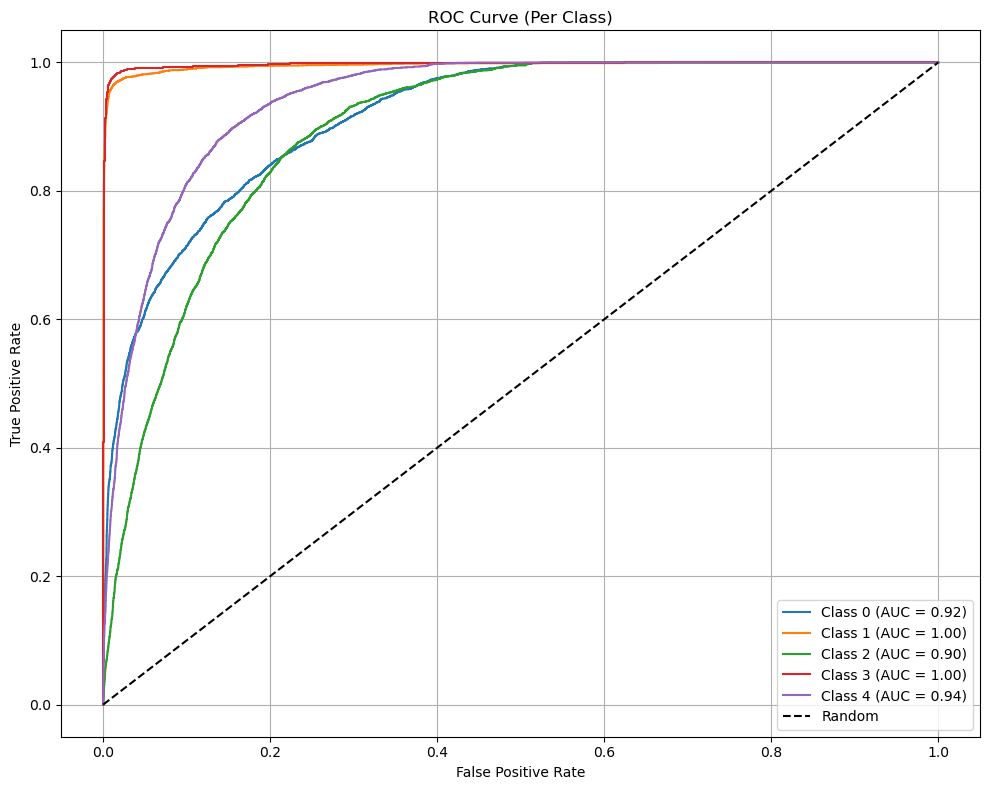

In [5]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Ensure y_test is binarized
n_classes = 5
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Per Class)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
import numpy as np
import os, glob, scipy.io, time
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import cheby2, filtfilt, resample_poly
from numpy.polynomial.polynomial import Polynomial
import pywt
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, SeparableConv1D, MaxPooling1D, GlobalAveragePooling1D,
                                     Flatten, Dense, Dropout, Multiply, Add, LayerNormalization,
                                     Lambda, GaussianNoise, BatchNormalization, SpatialDropout1D,
                                     Concatenate, Masking)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Set global random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

# --- GPU setup ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU detected: {gpus[0]}")
    tf.config.experimental.set_memory_growth(gpus[0], True)
else:
    print("⚠️ No GPU found. Training might be slow.")

# --- Constants ---
ORIG_FS = 256
TARGET_FS = 34.3
EPOCH_SAMPLES = 1024
TOTAL_HOURS = 10
EPOCHS_PER_HOUR = int(3600 * TARGET_FS / EPOCH_SAMPLES)
TOTAL_EPOCHS = TOTAL_HOURS * EPOCHS_PER_HOUR
DWT_LEVELS = 4
WAVELET = 'db4'
NUM_CLASSES = 5

# --- Hjorth Parameters ---
def hjorth_parameters(signal):
    try:
        activity = np.var(signal)
        diff = np.diff(signal)
        mobility = np.std(diff) / (np.std(signal) + 1e-10)
        diff2 = np.diff(diff)
        complexity = (np.std(diff2) / (np.std(diff) + 1e-10)) / (mobility + 1e-10)
        return np.array([activity, mobility, complexity])
    except Exception as e:
        print(f"Error in Hjorth parameters: {e}")
        return np.zeros(3)

# --- Preprocessing functions ---
def cheby2_lowpass_filter(signal, fs, cutoff=8, order=8, rs=40):
    try:
        nyq = 0.5 * fs
        wp = cutoff / nyq
        b, a = cheby2(order, rs, wp, btype='low', analog=False)
        filtered = filtfilt(b, a, signal)
        return filtered
    except Exception as e:
        print(f"Error in cheby2 filter: {e}")
        return signal

def poly_detrend(signal, degree=10):
    try:
        x = np.arange(len(signal))
        coefs = Polynomial.fit(x, signal, degree).convert().coef
        trend = np.polyval(coefs[::-1], x)
        detrended = signal - trend
        return detrended
    except Exception as e:
        print(f"Error in detrending: {e}")
        return signal

def min_max_norm(signal):
    try:
        min_val = np.min(signal)
        max_val = np.max(signal)
        if max_val - min_val == 0:
            return signal * 0
        return (signal - min_val) / (max_val - min_val)
    except Exception as e:
        print(f"Error in normalization: {e}")
        return signal

def extract_features(signal, wavelet=WAVELET, level=DWT_LEVELS):
    try:
        coeffs = pywt.wavedec(signal, wavelet, level=level)
        dwt_features = []
        for c in coeffs:
            dwt_features.extend([
                np.mean(c),
                np.std(c),
                np.sum(c**2),
                skew(c, bias=False) if np.std(c) > 1e-10 else 0.0,
                kurtosis(c, bias=False) if np.std(c) > 1e-10 else 0.0
            ])
        hjorth = hjorth_parameters(signal)
        features = np.concatenate([dwt_features, hjorth])
        return np.nan_to_num(features, nan=0.0, posinf=0.0, neginf=0.0)
    except Exception as e:
        print(f"Error in feature extraction: {e}")
        return np.zeros(28)

def preprocess_ppg_signal(ppg_signal, orig_fs=ORIG_FS, target_fs=TARGET_FS,
                          epoch_samples=EPOCH_SAMPLES, total_epochs=TOTAL_EPOCHS):
    try:
        filtered = cheby2_lowpass_filter(ppg_signal, orig_fs)
        detrended = poly_detrend(filtered)
        normalized = min_max_norm(detrended)
        up = int(target_fs * 1000)
        down = int(orig_fs * 1000)
        gcd = np.gcd(up, down)
        up //= gcd
        down //= gcd
        resampled = resample_poly(normalized, up, down)
        total_samples = epoch_samples * total_epochs
        if len(resampled) > total_samples:
            resampled = resampled[:total_samples]
        elif len(resampled) < total_samples:
            pad_len = total_samples - len(resampled)
            resampled = np.pad(resampled, (0, pad_len), 'constant')
        epochs = resampled.reshape(total_epochs, epoch_samples)
        mask = np.array([0 if np.sum(np.abs(e)) < 1e-10 else 1 for e in epochs])
        features = np.array([extract_features(epoch) for epoch in epochs])
        return epochs, features, mask
    except Exception as e:
        print(f"Error in preprocessing: {e}")
        return np.zeros((total_epochs, epoch_samples)), np.zeros((total_epochs, 28)), np.zeros(total_epochs)

# --- Load raw data and preprocess ---
folder_path = r"D:\abhishek_extracted\plm"
try:
    mat_files = sorted(glob.glob(os.path.join(folder_path, "*.mat")))[:39]
    if not mat_files:
        raise FileNotFoundError(f"No .mat files found in {folder_path}")
except Exception as e:
    print(f"Error loading files: {e}")
    exit(1)

X_epochs_list = []
X_features_list = []
y_epochs_list = []
mask_list = []

for file in mat_files:
    try:
        mat = scipy.io.loadmat(file)
        raw_signal = mat['ppg_signals'].flatten()
        sleep_labels = mat['sleep_stages'].flatten()
        epochs, features, mask = preprocess_ppg_signal(raw_signal)
        if len(sleep_labels) > epochs.shape[0]:
            sleep_labels = sleep_labels[:epochs.shape[0]]
        elif len(sleep_labels) < epochs.shape[0]:
            pad_len = epochs.shape[0] - len(sleep_labels)
            sleep_labels = np.pad(sleep_labels, (0, pad_len), 'constant', constant_values=-1)
        X_epochs_list.append(epochs)
        X_features_list.append(features)
        y_epochs_list.append(sleep_labels)
        mask_list.append(mask)
    except Exception as e:
        print(f"Error processing file {file}: {e}")
        continue

if not X_epochs_list:
    print("No valid data loaded. Exiting.")
    exit(1)

X_all = np.vstack(X_epochs_list)
X_features_all = np.vstack(X_features_list)
y_all = np.concatenate(y_epochs_list)
mask_all = np.concatenate(mask_list)

print(f"Total epochs: {X_all.shape[0]}, Each epoch samples: {X_all.shape[1]}, Features per epoch: {X_features_all.shape[1]}")

# Save preprocessed data
try:
    np.save("ppg_epochs.npy", X_all)
    np.save("features.npy", X_features_all)
    np.save("y_all.npy", y_all)
    np.save("mask.npy", mask_all)
except Exception as e:
    print(f"Error saving preprocessed data: {e}")

# --- Filter out invalid epochs ---
valid_idx = (y_all != -1) & (mask_all == 1)
X_all = X_all[valid_idx]
X_features_all = X_features_all[valid_idx]
y_all = y_all[valid_idx]

print(f"Valid epochs after masking: {len(y_all)}")
if len(y_all) == 0:
    print("No valid epochs after masking. Exiting.")
    exit(1)

# --- Print class distribution before augmentation ---
print("\nClass Distribution Before Augmentation:")
unique, counts = np.unique(y_all, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_all)*100:.2f}%)")

# --- Data Augmentation ---
def jitter(x, sigma=0.01):
    return x + np.random.normal(loc=0, scale=sigma, size=x.shape)

def scaling(x, sigma=0.1):
    return x * np.random.normal(loc=1.0, scale=sigma, size=x.shape)

def magnitude_warp(x, sigma=0.2):
    x = x.reshape(-1)
    warp = np.sin(np.linspace(0, np.pi, len(x))) * np.random.normal(1, sigma)
    return x * warp

np.random.seed(42)
augmented_ppg = []
augmented_features = []
augmented_labels = []
majority_classes = [0, 2]  # Wake, N2

for ppg, feat, label in zip(X_all, X_features_all, y_all):
    augmented_ppg.append(ppg)
    augmented_features.append(feat)
    augmented_labels.append(label)
    if label in majority_classes:
        if np.random.rand() < 0.3:
            aug_ppg = jitter(ppg, sigma=0.005)
            aug_feat = jitter(feat, sigma=0.002)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.3:
            aug_ppg = scaling(ppg, sigma=0.05)
            aug_feat = scaling(feat, sigma=0.02)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
    else:
        if np.random.rand() < 0.5:
            aug_ppg = jitter(ppg)
            aug_feat = jitter(feat, sigma=0.005)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.5:
            aug_ppg = magnitude_warp(ppg)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.5:
            aug_ppg = scaling(ppg)
            aug_feat = scaling(feat, sigma=0.05)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)

X_aug = np.array(augmented_ppg)
X_features_aug = np.array(augmented_features)
y_aug = np.array(augmented_labels)

# --- Print class distribution after augmentation ---
print("\nClass Distribution After Augmentation:")
unique, counts = np.unique(y_aug, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_aug)*100:.2f}%)")

# --- Standardization ---
try:
    scaler_ppg = StandardScaler()
    X_scaled = scaler_ppg.fit_transform(X_aug)
    scaler_features = StandardScaler()
    X_features_scaled = scaler_features.fit_transform(X_features_aug)
except Exception as e:
    print(f"Error in standardization: {e}")
    exit(1)

# --- Validate data ---
if np.any(np.isnan(X_scaled)) or np.any(np.isinf(X_scaled)):
    raise ValueError("NaN or infinite values in X_scaled")
if np.any(np.isnan(X_features_scaled)) or np.any(np.isinf(X_features_scaled)):
    raise ValueError("NaN or infinite values in X_features_scaled")
if X_scaled.shape[0] != y_aug.shape[0] or X_features_scaled.shape[0] != y_aug.shape[0]:
    raise ValueError(f"Inconsistent sample sizes: X_scaled={X_scaled.shape[0]}, X_features_scaled={X_features_scaled.shape[0]}, y_aug={y_aug.shape[0]}")

# --- Handle Class Imbalance with SMOTE ---
try:
    X_combined = np.concatenate([X_scaled, X_features_scaled], axis=1)
    min_samples = 6  # SMOTE k_neighbors=5 requires at least 6 samples
    class_counts = np.bincount(y_aug.astype(int), minlength=NUM_CLASSES)
    if np.any(class_counts < min_samples):
        print("\nWarning: Some classes have too few samples for SMOTE. Adjusting k_neighbors.")
        k_neighbors = min(np.min(class_counts[class_counts > 0]) - 1, 5)
        smote = SMOTE(random_state=42, k_neighbors=k_neighbors if k_neighbors > 0 else 1)
    else:
        smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_combined, y_aug)
except Exception as e:
    print(f"Error in SMOTE: {e}")
    exit(1)

# Split back into PPG and features
X_res_ppg = X_res[:, :X_scaled.shape[1]]
X_res_features = X_res[:, X_scaled.shape[1]:]

# --- Print class distribution after SMOTE ---
print("\nClass Distribution After SMOTE:")
unique, counts = np.unique(y_res, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_res)*100:.2f}%)")

# --- Class weights ---
try:
    class_weights = compute_class_weight("balanced", classes=np.unique(y_res), y=y_res)
    class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
except Exception as e:
    print(f"Error computing class weights: {e}")
    exit(1)

# --- Train-test split ---
try:
    X_train_ppg, X_test_ppg, X_train_features, X_test_features, y_train, y_test = train_test_split(
        X_res_ppg, X_res_features, y_res, test_size=0.2, stratify=y_res, random_state=42
    )
except Exception as e:
    print(f"Error in train-test split: {e}")
    exit(1)

# Expand dims for CNN input
try:
    X_train_ppg = X_train_ppg[..., np.newaxis]
    X_test_ppg = X_test_ppg[..., np.newaxis]
except Exception as e:
    print(f"Error in expanding dimensions: {e}")
    exit(1)

# One-hot encoding
try:
    y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=NUM_CLASSES)
    y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=NUM_CLASSES)
except Exception as e:
    print(f"Error in one-hot encoding: {e}")
    exit(1)

# --- Fixed focal loss alpha ---
alpha = [0.269, 1.399, 0.323, 1.960, 1.048]  # Based on Insomnia Dataset class distribution

# --- Focal loss ---
def focal_loss(gamma=1.5, alpha=alpha):
    alpha = tf.constant(alpha, dtype=tf.float32)
    def loss_fn(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        ce = -y_true * tf.math.log(y_pred)
        alpha_factor = y_true * alpha
        modulating_factor = tf.math.pow(1.0 - y_pred, gamma)
        loss = alpha_factor * modulating_factor * ce
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return loss_fn

# --- Dual-branch model ---
def build_hybrid_cnn_dwt_rvfl_light(ppg_shape, features_shape):
    reg = l2(1e-4)
    ppg_input = Input(shape=ppg_shape, name='ppg_input')
    x = GaussianNoise(0.05)(ppg_input)
    x = SeparableConv1D(32, 15, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    branch1 = SeparableConv1D(32, 3, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch1 = BatchNormalization()(branch1)
    branch2 = SeparableConv1D(32, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch2 = BatchNormalization()(branch2)
    branch3 = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch3 = BatchNormalization()(branch3)
    concat = Concatenate()([branch1, branch2, branch3])
    squeeze = GlobalAveragePooling1D()(concat)
    excitation = Dense(32, activation='relu', kernel_regularizer=reg)(squeeze)
    excitation = BatchNormalization()(excitation)
    excitation = Dense(concat.shape[-1], activation='sigmoid', kernel_regularizer=reg)(excitation)
    excitation = Lambda(lambda s: tf.expand_dims(s, 1))(excitation)
    scaled = Multiply()([concat, excitation])
    residual = SeparableConv1D(concat.shape[-1], 1, padding='same', kernel_regularizer=reg)(x)
    residual = BatchNormalization()(residual)
    out = Add()([scaled, residual])
    x = LayerNormalization()(out)
    res = SeparableConv1D(16, 1, padding='same', kernel_regularizer=reg)(x)
    res = BatchNormalization()(res)
    x = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(32, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)
    low = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    low = BatchNormalization()(low)
    high = x - tf.keras.layers.AveragePooling1D(pool_size=3, strides=1, padding='same')(x)
    x = Add()([low, high])
    x = LayerNormalization()(x)
    x = SeparableConv1D(64, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(64, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)
    attn = GlobalAveragePooling1D()(x)
    attn = Dense(128, activation='relu', kernel_regularizer=reg)(attn)
    attn = BatchNormalization()(attn)
    attn = Dense(64, activation='sigmoid', kernel_regularizer=reg)(attn)
    attn = Lambda(lambda z: tf.expand_dims(z, 1))(attn)
    x = Multiply()([x, attn])
    x = Add()([x, res])
    x = LayerNormalization()(x)
    ppg_out = Flatten()(x)
    features_input = Input(shape=features_shape, name='features_input')
    d = GaussianNoise(0.02)(features_input)
    d = Dense(64, activation='relu', kernel_regularizer=reg)(d)
    d = BatchNormalization()(d)
    d = Dropout(0.2)(d)
    d = Dense(32, activation='relu', kernel_regularizer=reg)(d)
    d = BatchNormalization()(d)
    features_out = d
    combined = Concatenate()([ppg_out, features_out])
    x = Dense(64, activation='relu', kernel_regularizer=reg)(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    outputs = Dense(NUM_CLASSES, activation='softmax')(x)
    return Model(inputs=[ppg_input, features_input], outputs=outputs)

# --- Compile & train ---
try:
    model = build_hybrid_cnn_dwt_rvfl_light((X_train_ppg.shape[1], 1), (X_train_features.shape[1],))
    model.compile(optimizer=Adam(2e-4),
                  loss=focal_loss(gamma=1.5),
                  metrics=['accuracy'])
except Exception as e:
    print(f"Error building/compiling model: {e}")
    exit(1)

model.summary()

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model_features_5class_plm.keras", save_best_only=True),
    ReduceLROnPlateau(patience=3, factor=0.5)
]

start_time = time.time()

try:
    history = model.fit([X_train_ppg, X_train_features], y_train_cat,
                        validation_data=([X_test_ppg, X_test_features], y_test_cat),
                        epochs=100, batch_size=32, class_weight=class_weight_dict,
                        callbacks=callbacks, verbose=1)
except Exception as e:
    print(f"Error during training: {e}")
    exit(1)

end_time = time.time()

# --- Plot training curves ---
try:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title("Accuracy")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title("Loss")
    plt.legend()
    plt.tight_layout()
    plt.savefig('training_curves.png')
    plt.close()
except Exception as e:
    print(f"Error plotting curves: {e}")

# --- Evaluation ---
try:
    y_pred = model.predict([X_test_ppg, X_test_features])
    y_pred_cls = np.argmax(y_pred, axis=1)
    y_true_cls = np.argmax(y_test_cat, axis=1)
    class_names = ['Wake', 'N1', 'N2', 'N3', 'REM']
    print("\nClassification Report:")
    print(classification_report(y_true_cls, y_pred_cls, target_names=class_names))
    cm = confusion_matrix(y_true_cls, y_pred_cls)
    print("Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig('confusion_matrix.png')
    plt.close()
    kappa = cohen_kappa_score(y_true_cls, y_pred_cls)
    print(f"\n🧠 Cohen Kappa Score: {kappa:.4f}")
except Exception as e:
    print(f"Error during evaluation: {e}")
    exit(1)

# --- Save model ---
try:
    model.save("cnn_features_rvfl_light_model_5class_plm.keras")
except Exception as e:
    print(f"Error saving model: {e}")

# --- Export TFLite ---
try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    with open("cnn_features_rvfl_light_model_5class_plm.tflite", "wb") as f:
        f.write(tflite_model)
except Exception as e:
    print(f"Error exporting TFLite: {e}")

print(f"\n⏱️ Total training time: {(end_time - start_time)/60:.2f} minutes")

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\DST\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py)

In [5]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\DST\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py)

In [7]:
pip show scikit-learn


Name: scikit-learnNote: you may need to restart the kernel to use updated packages.



Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause License
         
         Copyright (c) 2007-2024 The scikit-learn developers.
         All rights reserved.
         
         Redistribution and use in source and binary forms, with or without
         modification, are permitted provided that the following conditions are met:
         
         * Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
         
         * Redistributions in binary form must reproduce the above copyright notice,
           this list of conditions and the following disclaimer in the documentation
           and/or other materials provided with the distribution.
         
         * Neither the name of the copyright holder nor the names of its
           contributors may be used to endorse or promote products derived from
         

In [8]:
pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.10.1
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: c:\programdata\anaconda3\lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: imblearn
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import os, glob, scipy.io, time
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import cheby2, filtfilt, resample_poly
from numpy.polynomial.polynomial import Polynomial
import pywt
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, SeparableConv1D, MaxPooling1D, GlobalAveragePooling1D,
                                     Flatten, Dense, Dropout, Multiply, Add, LayerNormalization,
                                     Lambda, GaussianNoise, BatchNormalization, SpatialDropout1D,
                                     Concatenate, Masking)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

tf.keras.backend.clear_session()

# --- GPU setup ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU detected: {gpus[0]}")
    tf.config.experimental.set_memory_growth(gpus[0], True)
else:
    print("⚠️ No GPU found. Training might be slow.")

# --- Constants ---
ORIG_FS = 256
TARGET_FS = 34.3
EPOCH_SAMPLES = 1024
TOTAL_HOURS = 10
EPOCHS_PER_HOUR = int(3600 * TARGET_FS / EPOCH_SAMPLES)
TOTAL_EPOCHS = TOTAL_HOURS * EPOCHS_PER_HOUR
DWT_LEVELS = 4
WAVELET = 'db4'

# --- Hjorth Parameters ---
def hjorth_parameters(signal):
    activity = np.var(signal)
    diff = np.diff(signal)
    mobility = np.std(diff) / (np.std(signal) + 1e-10)
    diff2 = np.diff(diff)
    complexity = (np.std(diff2) / (np.std(diff) + 1e-10)) / (mobility + 1e-10)
    return np.array([activity, mobility, complexity])

# --- Preprocessing functions ---
def cheby2_lowpass_filter(signal, fs, cutoff=8, order=8, rs=40):
    nyq = 0.5 * fs
    wp = cutoff / nyq
    b, a = cheby2(order, rs, wp, btype='low', analog=False)
    filtered = filtfilt(b, a, signal)
    return filtered

def poly_detrend(signal, degree=10):
    x = np.arange(len(signal))
    coefs = Polynomial.fit(x, signal, degree).convert().coef
    trend = np.polyval(coefs[::-1], x)
    detrended = signal - trend
    return detrended

def min_max_norm(signal):
    min_val = np.min(signal)
    max_val = np.max(signal)
    if max_val - min_val == 0:
        return signal * 0
    return (signal - min_val) / (max_val - min_val)

def extract_features(signal, wavelet=WAVELET, level=DWT_LEVELS):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    dwt_features = []
    for c in coeffs:
        dwt_features.extend([
            np.mean(c),
            np.std(c),
            np.sum(c**2),
            skew(c, bias=False),
            kurtosis(c, bias=False)
        ])
    hjorth = hjorth_parameters(signal)
    return np.concatenate([dwt_features, hjorth])

def preprocess_ppg_signal(ppg_signal, orig_fs=ORIG_FS, target_fs=TARGET_FS,
                          epoch_samples=EPOCH_SAMPLES, total_epochs=TOTAL_EPOCHS):
    filtered = cheby2_lowpass_filter(ppg_signal, orig_fs)
    detrended = poly_detrend(filtered)
    normalized = min_max_norm(detrended)
    up = int(target_fs * 1000)
    down = int(orig_fs * 1000)
    gcd = np.gcd(up, down)
    up //= gcd
    down //= gcd
    resampled = resample_poly(normalized, up, down)
    total_samples = epoch_samples * total_epochs
    if len(resampled) > total_samples:
        resampled = resampled[:total_samples]
    elif len(resampled) < total_samples:
        pad_len = total_samples - len(resampled)
        resampled = np.pad(resampled, (0, pad_len), 'constant')
    epochs = resampled.reshape(total_epochs, epoch_samples)
    mask = np.array([0 if np.sum(e) == 0 else 1 for e in epochs])
    features = np.array([extract_features(epoch) for epoch in epochs])
    return epochs, features, mask

# --- Load raw data and preprocess ---
folder_path = r"D:\abhishek_extracted\plm"
mat_files = sorted(glob.glob(os.path.join(folder_path, "*.mat")))[:39]

X_epochs_list = []
X_features_list = []
y_epochs_list = []
mask_list = []

for file in mat_files:
    mat = scipy.io.loadmat(file)
    raw_signal = mat['ppg_signals'].flatten()
    sleep_labels = mat['sleep_stages'].flatten()
    epochs, features, mask = preprocess_ppg_signal(raw_signal)
    if len(sleep_labels) > epochs.shape[0]:
        sleep_labels = sleep_labels[:epochs.shape[0]]
    elif len(sleep_labels) < epochs.shape[0]:
        pad_len = epochs.shape[0] - len(sleep_labels)
        sleep_labels = np.pad(sleep_labels, (0, pad_len), constant_values=-1)
    X_epochs_list.append(epochs)
    X_features_list.append(features)
    y_epochs_list.append(sleep_labels)
    mask_list.append(mask)

X_all = np.vstack(X_epochs_list)
X_features_all = np.vstack(X_features_list)
y_all = np.concatenate(y_epochs_list)
mask_all = np.concatenate(mask_list)

print(f"Total epochs: {X_all.shape[0]}, Each epoch samples: {X_all.shape[1]}, Features per epoch: {X_features_all.shape[1]}")

# Save preprocessed data
np.save("ppg_epochs.npy", X_all)
np.save("features.npy", X_features_all)
np.save("sleep_labels.npy", y_all)
np.save("epoch_mask.npy", mask_all)

# --- Filter out zero-padded epochs ---
valid_idx = y_all != -1
valid_idx = valid_idx & (mask_all == 1)
X_all = X_all[valid_idx]
X_features_all = X_features_all[valid_idx]
y_all = y_all[valid_idx]

print(f"Valid epochs after masking: {len(y_all)}")

# --- Print class distribution before augmentation ---
print("\nClass Distribution Before Augmentation:")
unique, counts = np.unique(y_all, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_all)*100:.2f}%)")

# --- Data Augmentation ---
def jitter(x, sigma=0.01):
    return x + np.random.normal(loc=0, scale=sigma, size=x.shape)

def scaling(x, sigma=0.1):
    return x * np.random.normal(loc=1.0, scale=sigma, size=x.shape)

def magnitude_warp(x, sigma=0.2):
    x = x.reshape(-1)
    warp = np.sin(np.linspace(0, np.pi, len(x))) * np.random.normal(1, sigma)
    return x * warp

np.random.seed(42)
augmented_ppg = []
augmented_features = []
augmented_labels = []
majority_classes = [0, 2]

for ppg, feat, label in zip(X_all, X_features_all, y_all):
    augmented_ppg.append(ppg)
    augmented_features.append(feat)
    augmented_labels.append(label)
    if label in majority_classes:
        if np.random.rand() < 0.3:
            aug_ppg = jitter(ppg, sigma=0.005)
            aug_feat = jitter(feat, sigma=0.002)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.3:
            aug_ppg = scaling(ppg, sigma=0.05)
            aug_feat = scaling(feat, sigma=0.02)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
    else:
        if np.random.rand() < 0.5:
            aug_ppg = jitter(ppg)
            aug_feat = jitter(feat, sigma=0.005)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.5:
            aug_ppg = magnitude_warp(ppg)
            aug_feat = feat
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.5:
            aug_ppg = scaling(ppg)
            aug_feat = scaling(feat, sigma=0.05)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)

X_aug = np.array(augmented_ppg)
X_features_aug = np.array(augmented_features)
y_aug = np.array(augmented_labels)

# --- Print class distribution after augmentation ---
print("\nClass Distribution After Augmentation:")
unique, counts = np.unique(y_aug, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_aug)*100:.2f}%)")

# --- Standardization ---
scaler_ppg = StandardScaler()
X_scaled = scaler_ppg.fit_transform(X_aug)
scaler_features = StandardScaler()
X_features_scaled = scaler_features.fit_transform(X_features_aug)

# --- Handle Class Imbalance with SMOTE ---
X_combined = np.concatenate([X_scaled, X_features_scaled], axis=1)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_combined, y_aug)

# --- Print class distribution after SMOTE ---
print("\nClass Distribution After SMOTE:")
unique, counts = np.unique(y_res, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_res)*100:.2f}%)")

# Split back into PPG and features
X_res_ppg = X_res[:, :X_scaled.shape[1]]
X_res_features = X_res[:, X_scaled.shape[1]:]

# --- Class weights ---
class_weights = compute_class_weight("balanced", classes=np.unique(y_res), y=y_res)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# --- Train-test split ---
X_train_ppg, X_test_ppg, X_train_features, X_test_features, y_train, y_test = train_test_split(
    X_res_ppg, X_res_features, y_res, test_size=0.2, stratify=y_res, random_state=42
)

# Expand dims for CNN input
X_train_ppg = X_train_ppg[..., np.newaxis]
X_test_ppg = X_test_ppg[..., np.newaxis]

# One-hot encoding
num_classes = 5
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# --- Focal loss ---
def focal_loss(gamma=1.5, alpha = [0.269, 1.399, 0.323, 1.960, 1.048]):
    alpha = tf.constant(alpha, dtype=tf.float32)
    def loss_fn(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        ce = -y_true * tf.math.log(y_pred)
        alpha_factor = y_true * alpha
        modulating_factor = tf.math.pow(1.0 - y_pred, gamma)
        loss = alpha_factor * modulating_factor * ce
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return loss_fn

# --- Dual-branch model ---
def build_hybrid_cnn_dwt_rvfl_light(ppg_shape, features_shape):
    reg = l2(1e-4)
    ppg_input = Input(shape=ppg_shape, name='ppg_input')
    x = GaussianNoise(0.05)(ppg_input)
    x = SeparableConv1D(32, 15, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    branch1 = SeparableConv1D(32, 3, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch1 = BatchNormalization()(branch1)
    branch2 = SeparableConv1D(32, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch2 = BatchNormalization()(branch2)
    branch3 = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch3 = BatchNormalization()(branch3)
    concat = Concatenate()([branch1, branch2, branch3])
    squeeze = GlobalAveragePooling1D()(concat)
    excitation = Dense(32, activation='relu', kernel_regularizer=reg)(squeeze)
    excitation = BatchNormalization()(excitation)
    excitation = Dense(concat.shape[-1], activation='sigmoid', kernel_regularizer=reg)(excitation)
    excitation = Lambda(lambda s: tf.expand_dims(s, 1))(excitation)
    scaled = Multiply()([concat, excitation])
    residual = SeparableConv1D(concat.shape[-1], 1, padding='same', kernel_regularizer=reg)(x)
    residual = BatchNormalization()(residual)
    out = Add()([scaled, residual])
    x = LayerNormalization()(out)
    res = SeparableConv1D(16, 1, padding='same', kernel_regularizer=reg)(x)
    res = BatchNormalization()(res)
    x = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(32, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)
    low = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    low = BatchNormalization()(low)
    high = x - tf.keras.layers.AveragePooling1D(pool_size=3, strides=1, padding='same')(x)
    x = Add()([low, high])
    x = LayerNormalization()(x)
    x = SeparableConv1D(64, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(64, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)
    attn = GlobalAveragePooling1D()(x)
    attn = Dense(128, activation="relu", kernel_regularizer=reg)(attn)
    attn = BatchNormalization()(attn)
    attn = Dense(64, activation="sigmoid", kernel_regularizer=reg)(attn)
    attn = Lambda(lambda z: tf.expand_dims(z, 1))(attn)
    x = Multiply()([x, attn])
    x = Add()([x, res])
    x = LayerNormalization()(x)
    ppg_out = Flatten()(x)
    features_input = Input(shape=features_shape, name='features_input')
    d = GaussianNoise(0.02)(features_input)
    d = Dense(64, activation='relu', kernel_regularizer=reg)(d)
    d = BatchNormalization()(d)
    d = Dropout(0.2)(d)
    d = Dense(32, activation='relu', kernel_regularizer=reg)(d)
    d = BatchNormalization()(d)
    features_out = d
    combined = Concatenate()([ppg_out, features_out])
    x = Dense(64, activation='relu', kernel_regularizer=reg)(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs=[ppg_input, features_input], outputs=outputs)

# --- Compile & train ---
model = build_hybrid_cnn_dwt_rvfl_light((X_train_ppg.shape[1], 1), (X_train_features.shape[1],))
model.compile(optimizer=Adam(2e-4),
              loss=focal_loss(gamma=1.5, alpha = [0.269, 1.399, 0.323, 1.960, 1.048]),
              metrics=['accuracy'])

model.summary()

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model_features.keras", save_best_only=True),
    ReduceLROnPlateau(patience=3, factor=0.5)
]

start_time = time.time()

history = model.fit([X_train_ppg, X_train_features], y_train_cat,
                    validation_data=([X_test_ppg, X_test_features], y_test_cat),
                    epochs=100, batch_size=32, class_weight=class_weight_dict,
                    callbacks=callbacks, verbose=1)

end_time = time.time()

# --- Plot training curves ---
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# --- Evaluation ---
y_pred = model.predict([X_test_ppg, X_test_features])
y_pred_cls = np.argmax(y_pred, axis=1)
y_true_cls = np.argmax(y_test_cat, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_cls, y_pred_cls))

cm = confusion_matrix(y_true_cls, y_pred_cls)
print("Confusion Matrix:")
print(cm)

kappa = cohen_kappa_score(y_true_cls, y_pred_cls)
print(f"\n🧠 Cohen Kappa Score: {kappa:.4f}")

# --- Save model ---
model.save("cnn_features_rvfl_light_model.keras")

# --- Export TFLite ---
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("cnn_features_rvfl_light_model.tflite", "wb") as f:
    f.write(tflite_model)

print(f"\n⏱️ Total training time: {(end_time - start_time)/60:.2f} minutes")

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\DST\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py)